This is a quick and simple notebook using a deep learning model with keras that predicts heart disease.

Side Note: This notebook does not include any data cleaning or advanced visualization, and is just a quick overview of models with keras.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
# Load in the data
data = pd.read_csv('../input/heart-disease-dataset/heart.csv')

In [3]:
# Examine the data
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
# Split the data into training and testing
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Create a custom early stoppinng callback that stops training the model after the accuracy is 100%
# The custom callback inherits from tensorflow.keras.callbacks.Callback
class MyThresholdCallback(keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        accuracy = logs["val_binary_accuracy"]
        if accuracy >= self.threshold:
            self.model.stop_training = True
            
            
early_stopping = MyThresholdCallback(threshold=1.0)

In [6]:
# Create the model with 4 dense layers (dense layers contain our neurons)
# The model uses BatchNormilzation() in order to scale our data in the range: [0, 1]
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu', input_shape=[X.shape[1]]),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

# Compile the model using adam
# Measure our loss with binary_crossentropy
# Set metrics to binary_accuracy, which lets us know how accurate the model is
# Keep in mind that the accuracy lies on a scale of [0.0, 1.0],
# In order to convert this accuracy to percentage, move the decimal point to the right twice (acc*100)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

# Finally fit the model, training it with X_train and y_train, and validating it with X_test and y_test
# Use 25 data points per epoch (the amount of epochs is the amount of times we feed the model data)
# Use the custom callback defined earlier that stops the model at 100% accuracy
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=25,
    epochs=30,
    callbacks=[early_stopping]
)

2022-04-26 02:22:40.088733: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-04-26 02:22:40.240883: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
33/33 [==============================] - 2s 21ms/step - loss: 0.4809 - binary_accuracy: 0.8341 - val_loss: 0.6415 - val_binary_accuracy: 0.5805
Epoch 2/30
33/33 [==============================] - 0s 11ms/step - loss: 0.2021 - binary_accuracy: 0.9207 - val_loss: 0.5526 - val_binary_accuracy: 0.7805
Epoch 3/30
33/33 [==============================] - 0s 11ms/step - loss: 0.1162 - binary_accuracy: 0.9537 - val_loss: 0.5417 - val_binary_accuracy: 0.6683
Epoch 4/30
33/33 [==============================] - 0s 11ms/step - loss: 0.1180 - binary_accuracy: 0.9524 - val_loss: 0.4706 - val_binary_accuracy: 0.7707
Epoch 5/30
33/33 [==============================] - 0s 10ms/step - loss: 0.1515 - binary_accuracy: 0.9476 - val_loss: 0.3640 - val_binary_accuracy: 0.8537
Epoch 6/30
33/33 [==============================] - 0s 11ms/step - loss: 0.1361 - binary_accuracy: 0.9561 - val_loss: 0.2937 - val_binary_accuracy: 0.8829
Epoch 7/30
33/33 [==============================] - 0s 11ms/step - los

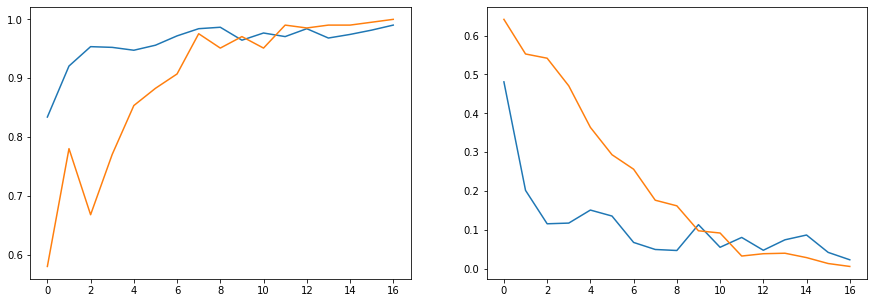

In [7]:
# Now plot our increase/decrease in percentage and loss
# The left graph represents percent, and the right graph represents loss
# Keep in mind, we're looking for a high percent and a low loss
history_df = pd.DataFrame(history.history)

f, (ax1, ax2) = plt.subplots(1, 2)
f.figure.set_figheight(5)
f.figure.set_figwidth(15)

ax1.plot(history_df.index, history_df['binary_accuracy'])
ax1.plot(history_df.index, history_df['val_binary_accuracy'])

ax2.plot(history_df.index, history_df['loss'])
ax2.plot(history_df.index, history_df['val_loss'])